**Importing necessary libraries & Metrices**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Loading the Dataset

In [2]:
#read the dataset into dataframe
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

**Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Shape of the dataframe

df.shape

(1460, 81)

In [6]:
#Statistical summary of the dataset

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Visualaization**

House Price Distribution

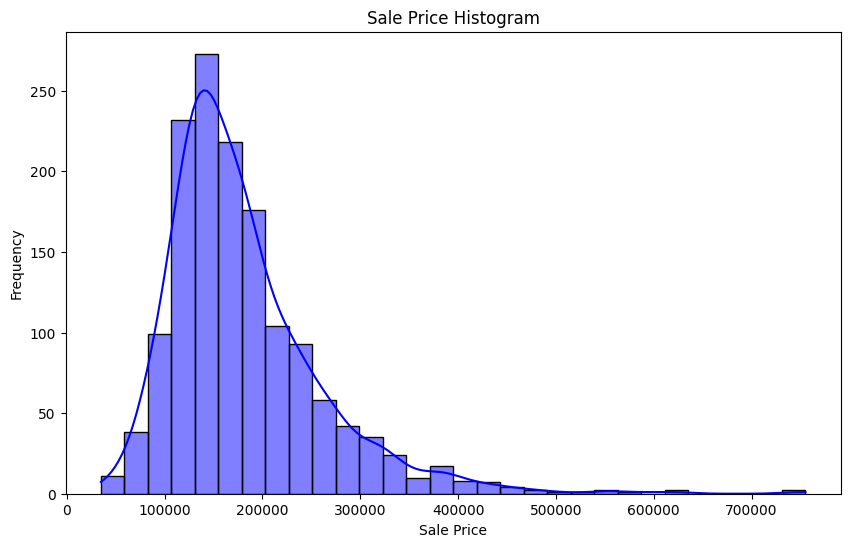

In [7]:
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.histplot(df['SalePrice'], kde=True, color='blue', bins=30)  # Adjust the number of bins as needed
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price Histogram')
plt.show()

Bar plot will help identify which features have the strongest positive or negative correlation with the sales price

In [8]:
# Select only the numerical columns (excluding 'Id')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'])

In [9]:
correlation_matrix = numerical_columns.corr()
correlation_with_saleprice = correlation_matrix['SalePrice']

# Sort the correlations in descending order to see the most positively and negatively correlated features
sorted_correlation = correlation_with_saleprice.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


A correlation coefficient measures the strength and direction of a linear relationship between two variables. In this case, it indicates how strongly each numerical feature is related to the 'SalePrice' column.

A positive correlation coefficient indicates a positive linear relationship, meaning that as the feature increases, the 'SalePrice' tends to increase. For example, 'OverallQual' has a positive correlation of 0.790982, which suggests that as the overall quality of a house increases, the sale price tends to increase as well.

A negative correlation coefficient indicates a negative linear relationship, meaning that as the feature increases, the 'SalePrice' tends to decrease. For example, 'KitchenAbvGr' has a negative correlation of -0.135907, which suggests that as the number of kitchens above ground increases, the sale price tends to decrease.

The closer the absolute value of the correlation coefficient is to 1, the stronger the linear relationship. For example, 'OverallQual' has a strong positive relationship with 'SalePrice' because the correlation coefficient is close to 1.

Features with correlation coefficients close to 0 have a weak linear relationship with 'SalePrice'. For example, 'MiscVal' has a very small correlation coefficient of -0.021190, indicating a weak relationship.

Features with very small or close-to-zero correlation coefficients (e.g., 'BsmtFinSF2' with a coefficient of -0.011378) have little to no linear relationship with 'SalePrice'.

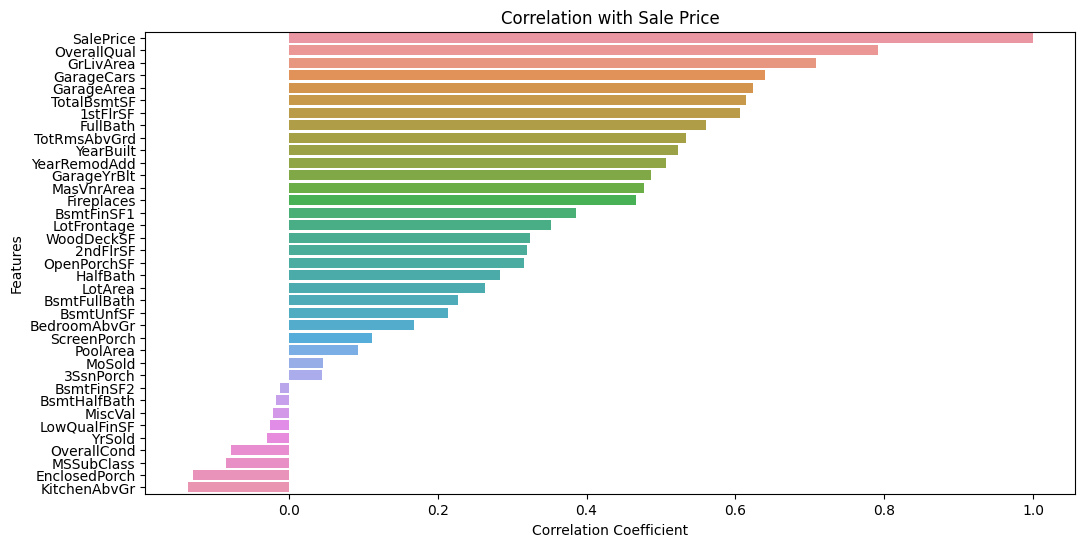

In [10]:
# Create a bar plot to visualize the correlations with 'SalePrice'
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index)
plt.title('Correlation with Sale Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

**Feature Selection**

Based on the bar plot we will select features which has correlation more than 0.50 and less than -0.50

In [11]:
# Select columns with correlation >= 0.5 or correlation <= -0.5
high_corr_columns = sorted_correlation[(sorted_correlation > 0.5) | (sorted_correlation < -0.5)]

# Filter the columns based on correlation
selected_columns = high_corr_columns.index

# Display the selected columns
print(selected_columns)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


In [12]:
categorical_columns = df.select_dtypes(include=['object'])

# Display the names of the selected categorical columns
print(categorical_columns.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [13]:
# Filter the DataFrame to include only the selected columns
filtered_df = df[selected_columns]

# Concatenate the filtered DataFrame and the categorical columns DataFrame
combined_df = pd.concat([filtered_df, categorical_columns], axis=1)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  ...  GarageType GarageFinish  \
0       856         2             8       2003  ...      Attchd          RFn   
1      1262         2             6       1976  ...      Attchd          RFn   
2       920         2             6       2001  ...      Attchd          RFn   
3       961         1             7       1915  ...      Detchd          Unf   
4      1145         2             9       2000  ...      Attchd          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeat

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   OverallQual    1460 non-null   int64 
 2   GrLivArea      1460 non-null   int64 
 3   GarageCars     1460 non-null   int64 
 4   GarageArea     1460 non-null   int64 
 5   TotalBsmtSF    1460 non-null   int64 
 6   1stFlrSF       1460 non-null   int64 
 7   FullBath       1460 non-null   int64 
 8   TotRmsAbvGrd   1460 non-null   int64 
 9   YearBuilt      1460 non-null   int64 
 10  YearRemodAdd   1460 non-null   int64 
 11  MSZoning       1460 non-null   object
 12  Street         1460 non-null   object
 13  Alley          91 non-null     object
 14  LotShape       1460 non-null   object
 15  LandContour    1460 non-null   object
 16  Utilities      1460 non-null   object
 17  LotConfig      1460 non-null   object
 18  LandSlope      1460 non-null

In [15]:
combined_df.shape

(1460, 54)

Now lets look on the missing values

In [16]:
#The number of missing values, and the percentage of missing values for each column in combined_df.

total_rows = len(combined_df)
null_counts = combined_df.isnull().sum()

# Display columns with null values and their percentages
columns_with_null = null_counts[null_counts > 0]
percent_missing = (columns_with_null / total_rows) * 100

missing_info = pd.DataFrame({'Column_Name': columns_with_null.index, 'Missing_Count': columns_with_null.values, 'Percentage': percent_missing.values})

print(missing_info)

     Column_Name  Missing_Count  Percentage
0          Alley           1369   93.767123
1     MasVnrType            872   59.726027
2       BsmtQual             37    2.534247
3       BsmtCond             37    2.534247
4   BsmtExposure             38    2.602740
5   BsmtFinType1             37    2.534247
6   BsmtFinType2             38    2.602740
7     Electrical              1    0.068493
8    FireplaceQu            690   47.260274
9     GarageType             81    5.547945
10  GarageFinish             81    5.547945
11    GarageQual             81    5.547945
12    GarageCond             81    5.547945
13        PoolQC           1453   99.520548
14         Fence           1179   80.753425
15   MiscFeature           1406   96.301370


<Axes: >

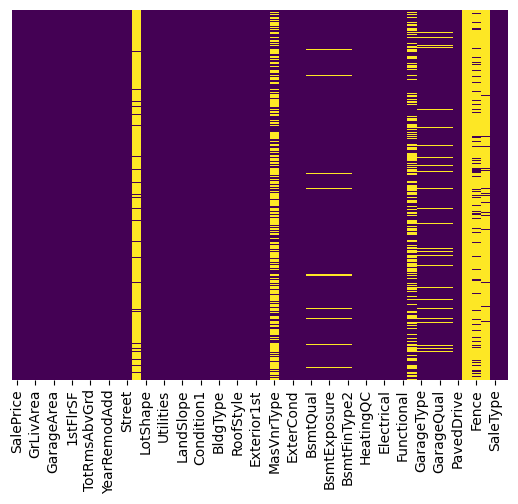

In [17]:
sns.heatmap(combined_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the columns which has more than 50% of null values

In [18]:
# Define the percentage threshold (e.g., 50%)
percentage_threshold = 50  # Adjust as needed

# Calculate the threshold count based on the percentage
total_rows = len(combined_df)
null_threshold = (percentage_threshold / 100) * total_rows

# Get the column names with null values exceeding the threshold
columns_to_drop = combined_df.columns[combined_df.isnull().sum() > null_threshold]

# Drop the columns with high null values
combined_df = combined_df.drop(columns=columns_to_drop)


In [19]:
combined_df.isnull().sum()

SalePrice          0
OverallQual        0
GrLivArea          0
GarageCars         0
GarageArea         0
TotalBsmtSF        0
1stFlrSF           0
FullBath           0
TotRmsAbvGrd       0
YearBuilt          0
YearRemodAdd       0
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType     

In [20]:
#Filling missing values of categorical columns with the mode 

# Columns to fill missing values for
columns_to_fill = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical','FireplaceQu','GarageFinish','GarageType','GarageQual','GarageCond']

# Fill missing values with a specific string (e.g., 'None')
fill_value = 'None'

for column in columns_to_fill:
    mode_value = combined_df[column].mode()[0]  # Calculate the mode for the column
    combined_df[column] = combined_df[column].fillna(mode_value)  # Fill missing values with the mode

In [21]:
combined_df.isnull().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

**One-Hot Encoding**

In [22]:
# Get the list of column names with the 'object' data type
categorical_columns = combined_df.select_dtypes(include=['object']).columns.tolist()

# Display the list of categorical variable names
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [23]:
def category_onehot_multcols(multcolumns):
    df_final=combined_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(combined_df[fields],drop_first=True)
        
        combined_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([combined_df,df_final],axis=1)
        
    return df_final

In [24]:
combined_df=category_onehot_multcols(categorical_columns)


MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [25]:
combined_df.shape

(1460, 208)

In [26]:
combined_df =combined_df.loc[:,~combined_df.columns.duplicated()]

Splitting the data into X and y chunks

In [27]:
X = combined_df.drop("SalePrice", axis=1)
y = combined_df["SalePrice"]

**Train-Test Split**

In [28]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets (e.g., 80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection**

**Random Forest**

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Model Evaluation:**

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE as the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 17763.43
MSE: 832092802.97
RMSE: 28846.02
R-squared: 0.89


In [31]:
#Calculate the natural logarithm of the predicted and actual values
y_pred_log = np.log(y_pred)
y_test_log = np.log(y_test)

# Calculate the squared differences between the logarithms
squared_diff = (y_pred_log - y_test_log)**2

# Calculate the mean squared difference
mean_squared_diff = np.mean(squared_diff)

# Calculate RMSE as the square root of the mean squared difference
rmse = np.sqrt(mean_squared_diff)

print(f"Root Mean Squared Error (RMSE) with logarithm transformation: {rmse:.2f}")

Root Mean Squared Error (RMSE) with logarithm transformation: 0.16


Hyperparameter optimization of the Random Forest Model

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Hyperparameters:", best_params)
print(f"RMSE with Best Model: {rmse:.2f}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
RMSE with Best Model: 29079.04


**GradientBoostingRegressor**

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [34]:
# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE as the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 18160.37
MSE: 763635799.45
RMSE: 27633.96
R-squared: 0.90


In [35]:
# Assuming y_pred and y_test are your predicted and actual sales prices

# Calculate the natural logarithm of the predicted and actual sales prices
y_pred_log = np.log(y_pred)
y_test_log = np.log(y_test)

# Calculate the mean squared error (MSE) between the logarithms
mse = mean_squared_error(y_test_log, y_pred_log)

# Calculate the RMSE as the square root of the MSE
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) with logarithmic transformation: {rmse:.2f}")

Root Mean Squared Error (RMSE) with logarithmic transformation: 0.16


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with the model, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a GradientBoostingRegressor with the best hyperparameters
best_gb_model = GradientBoostingRegressor(random_state=42, **best_params)

# Train the model with the training data
best_gb_model.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = best_gb_model.predict(X_test)

In [37]:
# Calculate RMSE for the predictions
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print("Best Hyperparameters:", best_params)
print("RMSE with Best Model:", rmse_tuned)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
RMSE with Best Model: 28619.18629092514


Both models perform well, and their RMSE values are close. However, the GradientBoostingRegressor model has a slightly lower RMSE, indicating better predictive performance. Therefore, the GradientBoostingRegressor model is the better model for this house price prediction task.